# Standard RB Demo

This is a very basic implemention of a standard RB experiment

*NOTE: the circuit generation code of this demo is quite slow*

In [3]:
import numpy as np
import qiskit_experiments as qe
rb = qe.randomized_benchmarking

# For simulation
from qiskit.test.mock import FakeParis
backend = FakeParis()

## Running 1-qubit RB

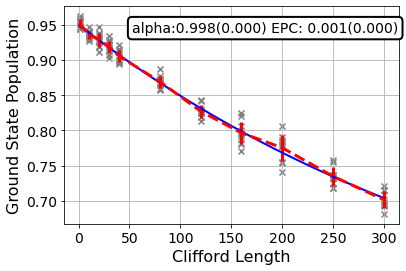

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 0878bdbb-311e-4472-b2e2-d9f307a7c0c0
Status: COMPLETE
Circuits: 110
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- EPC: 0.001119304980237934
- EPC_err: 0.00018390937726186978
- params: [0.5023363  0.99776139 0.44770251]
- params_err: [0.05981659 0.000367   0.06104121]
- prams_cov: [[ 3.57802470e-03  2.18081044e-05 -3.64952094e-03]
 [ 2.18081044e-05  1.34685588e-07 -2.23075734e-05]
 [-3.64952094e-03 -2.23075734e-05  3.72602970e-03]]

In [5]:
lengths = [1, 10, 20, 30, 40, 80, 120, 160, 200, 250, 300]
num_samples = 10
seed1 = 1010

# Run an RB experiment on qubit 0
exp1 = rb.RBExperiment([0], lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend)

# View result data
expdata1

## Running 2-qubit RB

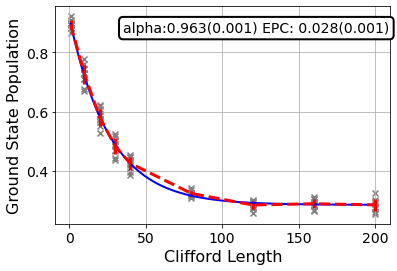

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 8a75da7a-9072-4859-8a93-911cc1280da7
Status: COMPLETE
Circuits: 90
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- EPC: 0.02785748826768128
- EPC_err: 0.0007514101793057707
- params: [0.63701578 0.96285668 0.28365146]
- params_err: [0.00758144 0.00096467 0.00402297]
- prams_cov: [[ 5.74782698e-05 -1.80689519e-06 -1.18908020e-05]
 [-1.80689519e-06  9.30582581e-07 -2.27642632e-06]
 [-1.18908020e-05 -2.27642632e-06  1.61842914e-05]]

In [6]:
lengths = [1, 10, 20, 30, 40, 80, 120, 160, 200]
num_samples = 10
seed = 1010

# Run an RB experiment on qubits 0,
exp2 = rb.RBExperiment([0, 1], lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend)

# View result data
expdata2

## Running parallel RB experiments

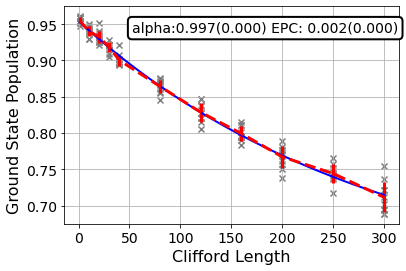

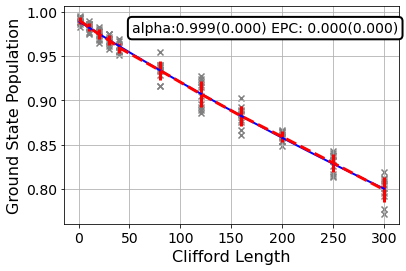

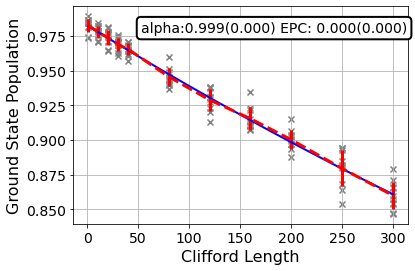

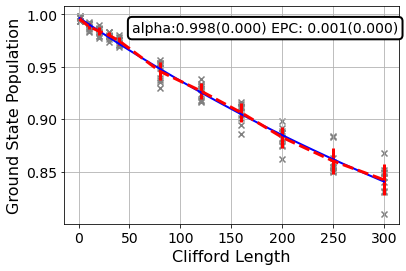

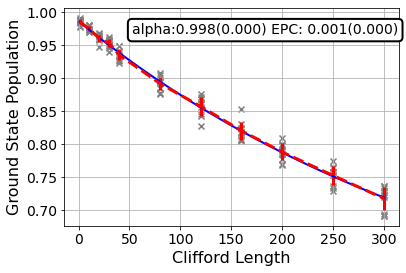

---------------------------------------------------
Experiment: ParallelExperiment
Experiment ID: 29285f61-261d-491a-b272-0af6c2222643
Status: COMPLETE
Component Experiments: 5
Circuits: 110
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- experiment_types: ['RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment']
- experiment_ids: ['c44d811e-96b3-4e04-bad5-b61ef7aba1a0', 'c06f587a-2b4f-41c3-bcca-455d95b9d360', 'eadfc8e7-bbf4-4e75-af25-b984a2e66a3a', '63f0ad46-c826-41a6-933c-1e0428c40912', '94bb5c52-7ad3-44e6-aa16-40d5d5208f75']
- experiment_qubits: [(0,), (1,), (2,), (3,), (4,)]

In [7]:
lengths = [1, 10, 20, 30, 40, 80, 120, 160, 200, 250, 300]
num_samples = 10
seed1 = 1010

exps = [rb.RBExperiment([i], lengths, num_samples=num_samples, seed=seed + i)
        for i in range(5)]

par_exp = qe.composite.ParallelExperiment(exps)
par_expdata = par_exp.run(backend)

# View result
par_expdata

#### Viewing sub experiment data

The experiment data returned from a batched experiment also contains individual experiment data for each sub experiment which can be accessed using `experiment_data(index)`

In [10]:
# Print sub-experiment data
for i in range(par_exp.num_experiments):
    print(par_expdata.component_experiment_data(i), '\n')

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: c44d811e-96b3-4e04-bad5-b61ef7aba1a0
Status: COMPLETE
Circuits: 110
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- EPC: 0.00171735618424107
- EPC_err: 0.0001927717906319814
- params: [0.37215037 0.99656529 0.58217255]
- params_err: [0.02545613 0.00038422 0.02660947]
- prams_cov: [[ 6.48014410e-04  9.58167940e-06 -6.75437728e-04]
 [ 9.58167940e-06  1.47624509e-07 -1.01157503e-05]
 [-6.75437728e-04 -1.01157503e-05  7.08063867e-04]] 

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: c06f587a-2b4f-41c3-bcca-455d95b9d360
Status: COMPLETE
Circuits: 110
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- EPC: 0.0004519357276072111
- EPC_err: 0.00018652963757587293
- params: [0.79755677 0.99909613 0.1920567 ]
- params_err: [0.28947038 0.00037272 0.29048724]
- prams_cov: [